<a href="https://colab.research.google.com/github/VenuGopal1899/Deep-Learning-Projects/blob/main/4_Fourth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from keras.datasets import boston_housing
import numpy as np

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Feature-wise normalization - For each feature input, subtract mean of the feature and divide by standard deviation, so that all features are centered around 0 and have a unit standard deviation.

In [13]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Build model for a typical Scalar Regression

In [14]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model 

K-fold Validation (As the input training data is too small for splitting it into partial_training_set and validation_set)

In [15]:
k = 4
num_epochs = 100
num_val_samples = len(train_data)//k
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
    all_scores.append(val_mae)

print(all_scores)
print(np.mean(all_scores))

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
[2.2554492950439453, 2.8561534881591797, 2.698434591293335, 2.465155839920044]
2.568798303604126


Use num_epochs = 500 and saving history (validation data)

In [16]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i*num_val_samples : (i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1)*num_val_samples]

    partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    # print(history.history.keys())
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history) 

avg_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


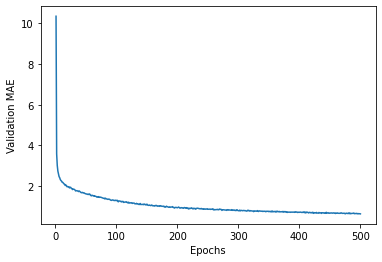

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(avg_mae_history) + 1), avg_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Smoothen the curve in above plot

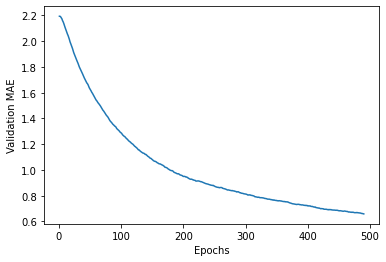

In [18]:
def smoothen_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points: 
          previous = smoothed_points[-1]
          smoothed_points.append(previous*factor + point*(1-factor))
        else:
          smoothed_points.append(point)

    return smoothed_points

smooth_mae_history = smoothen_curve(avg_mae_history[10:])  

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Final model

In [19]:
model = build_model()

model.fit(train_data, train_targets, epochs=500, batch_size=16, verbose=0)

tets_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 12.6049 - mae: 2.3894
2.389416217803955
